In [1]:
import scvelo as scv
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import anndata as ad
import scvelo as scv

In [2]:
adata_split1 = ad.read_h5ad("/home/users/kzlin/kzlinlab/projects/veloUncertainty/out/kevin/Writeup11/Writeup11_scvelo_larry_full-block_split1.h5ad")
adata_split1

AnnData object with n_obs × n_vars = 49302 × 830
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y', 'n_genes_by_counts', 'total_counts', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'gene_cluster', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'log1p', 'neighbors', 'pca', 'recover_dynamics', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs', 'loss'
    layers: 'Ms', 'Mu', 'fit_t'

In [3]:
adata_split2 = ad.read_h5ad("/home/users/kzlin/kzlinlab/projects/veloUncertainty/out/kevin/Writeup11/Writeup11_scvelo_larry_full-block_split2.h5ad")
adata_split2

AnnData object with n_obs × n_vars = 49302 × 839
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y', 'n_genes_by_counts', 'total_counts', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'gene_cluster', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'log1p', 'neighbors', 'pca', 'recover_dynamics', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs', 'loss'
    layers: 'Ms', 'Mu', 'fit_t'

In [4]:
adata = ad.read_h5ad("/home/users/kzlin/kzlinlab/projects/veloUncertainty/out/kevin/Writeup11/Writeup11_scvelo_larry_full-block.h5ad")
adata

AnnData object with n_obs × n_vars = 49302 × 1042
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y', 'n_genes_by_counts', 'total_counts', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'gene_cluster', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'data_des', 'hvg', 'log1p', 'neighbors', 'pca', 'recover_dynamics', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_clone', 'X_emb', 'X_pca', 'X_umap'
    varm: 'PCs'

In [5]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40) # used to be n_neighbors=10
sc.tl.umap(adata)
scv.tl.velocity_graph(adata)

computing neighbors
    finished (0:00:58) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:05) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocity graph (using 1/20 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:01:57) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:11) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


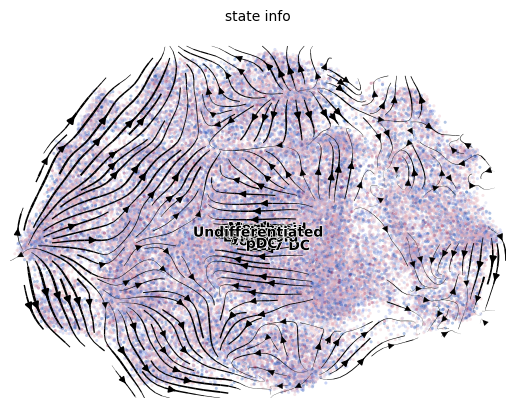

In [6]:
celltype_label = 'state_info'
scv.pl.velocity_embedding_stream(adata, 
                                 basis='umap',
                                 color=celltype_label,
                                 recompute=True)

In [7]:
import sys
sys.path.append('/home/users/kzlin/kzlinlab/projects/veloUncertainty/git/veloUncertainty/veloUncertainty')
from v2_functions import *

In [9]:
method = 'scv'
text_x=None
text_y=None
cos_sim, Ngenes = compute_cosine_similarity(
    adata_split1,
    adata_split2,
    method
)
cos_sim

Number of overlapped genes for velocity computation in splits = 378


array([0.3968401 , 0.30976312, 0.47421864, ..., 0.52983289, 0.78834299,
       0.5335185 ])

Text(0.5, 1.0, 'Histogram of cosine similarity, Ngenes=378')

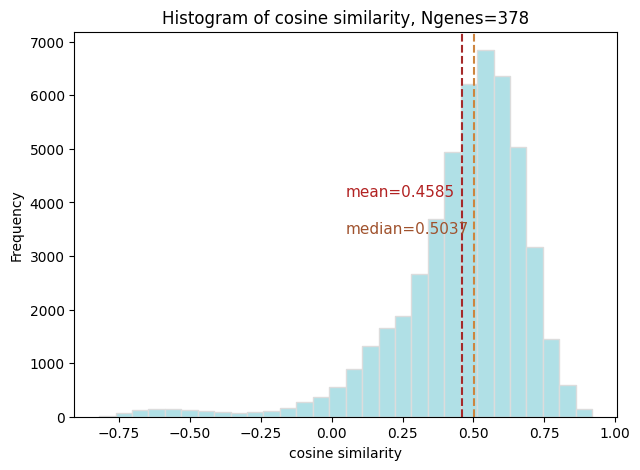

In [10]:
plt.figure(figsize=(7, 5))
counts, bins, patches = plt.hist(cos_sim, bins=30, edgecolor='gainsboro',color='powderblue') 
max_frequency = np.max(counts)
if text_x is None: text_x = np.quantile(cos_sim,[.05])[0]
if text_y is None: text_y = max_frequency/5
plt.axvline(np.mean(cos_sim), color='brown', linestyle='dashed', linewidth=1.5) ## add mean
plt.axvline(np.median(cos_sim), color='peru', linestyle='dashed', linewidth=1.5) ## add median
plt.text(text_x,text_y*3,'mean='+str(np.round(np.mean(cos_sim),4)), color='firebrick', fontsize=11)
plt.text(text_x,text_y*2.5,'median='+str(np.round(np.median(cos_sim),4)), color='sienna', fontsize=11)
plt.xlabel('cosine similarity')
plt.ylabel('Frequency')
plt.title('Histogram of cosine similarity, Ngenes='+str(Ngenes))